# Template Matching

For this project, you need to implement the template matching algorithm and show the result.

In [1]:
# Include necessary packages
from __future__ import print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from p3 import *

# 0 Preparation

Run the following cell, and you should see the image and the template that you need to match for this project.

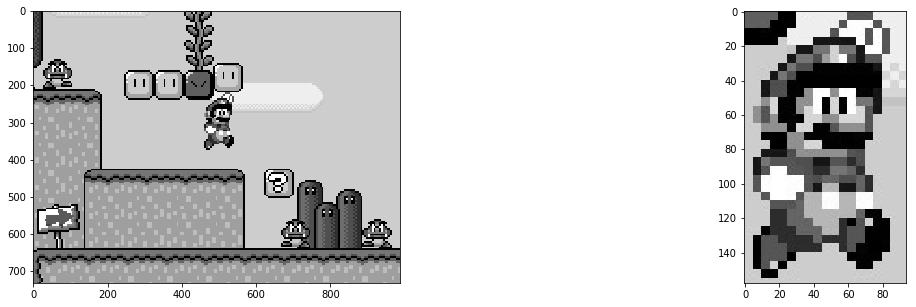

(732, 987)
(158, 94)


In [3]:
# Read the main image as color image
img_rgb = cv2.imread('Mario.jpg')
  
# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
  
# Read the template 
template = cv2.imread('Template.jpg',0) 

# Display
f = plt.figure(figsize=(20, 5))
f.add_subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray')
f.add_subplot(1,2,2)
plt.imshow(template,  cmap = 'gray')
plt.show()

print(img_gray.shape)
print(template.shape)

# 1 Normalized Cross Correlation 

To locate the template in the image, we need to maximize the Normalized Cross Correlation (NCC) between the image and the template. 

Remember that from the lecture slide, NCC is defined by the following equation:

$$NCC = \frac{∑_𝑚∑_𝑛𝑓[𝑚,𝑛]𝑡[𝑚−𝑖,𝑛−𝑗]}{\sqrt{∑_𝑚∑_𝑛𝑓^2[𝑚,𝑛]} \sqrt{∑_𝑚∑_𝑛𝑡^2[𝑚−𝑖, 𝑛−𝑗]}}$$

Another approach would be to use [ZNCC](https://www.wikiwand.com/en/Cross-correlation#/Zero-normalized_cross-correlation_%28ZNCC%29). 
That means when we are computing the NCC over the template and the patch of the image, we need to make each of them zero mean:
$$\mu = \frac{1}{N}∑_{x,y} I(x,y) $$

$$Z(x,y) = I(x,y) -\mu $$

Then make unit variance:
 $$ \sigma^2 = \frac{1}{N}∑_{x,y} Z^2(x,y) $$
 
 $$ ZN(x,y) = \frac{Z(x,y)}{\sigma}$$

Now, lets write our own NCC function here (you can also implement ZNCC if you prefer; please keep the function name NCC unchanged in this case):
```python
def NCC(img, tmp):
    # TODO
    return ncc
```

Input:
* img: The input image.
* tmp: The template image.

Output:
* A 2D numpy array that contains the NCC values. The size should be smaller than the input image, and the data type is np.float.

Scores: 4

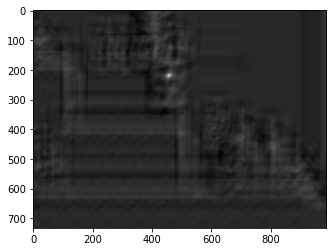

In [4]:
# Visulize your result, although it is slow, it should take less than 1 minute
res = NCC(img_gray,template)
plt.imshow(res, cmap = 'gray')
plt.show()

# 2 Threshold 

You need to specify a threshold and return the coordiantes of matched area in a numpy array.

```python
def Threshold(res):
    # TODO
    return coords
```

Input:
* res (2D array): The NCC result.

Output:
* coords (list of tuple): List containing (row, col) above the threshold.

Scores: 2

In [5]:
coords = Threshold(res)
print(coords)

[(219, 456)]


# 3 Draw bounding boxes
For each position where the NCC is above the threshold, draw a rectangle centering at it. The size of the rectangle should be the same as the size of the template.

Note: OpenCV read images as BGR order, while matplolib shows it in RGB order.

```python
def Bounding_box(img_rgb, template, coords):
    # TODO
    return img_detected
```

Input:
* img_rgb (2D array): the input image in color.
* template (2D array): the template image (we just need its shape actually).
* coords (list of tuple): the result from the second question.

Output:
* img_detected (2D array): the result image with rectangle(s)

Scores: 2

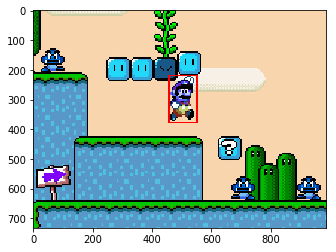

In [6]:
# Show the final image with the matched area. 
img = Bounding_box(img_rgb, template, coords)
plt.imshow(img) 
plt.show()